In [424]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import json 

In [197]:
colnames = ['row_num', 'geo_id', 'geo_id2', 'geo_display_label', 'NAICS_id', 'NAICS_display_label', 'RCPSZFE_id', 'RCPSZFE_display_label', 'year', 'estab']
data = pandas.read_csv('data1.csv', names=colnames)

In [376]:
#extract data from csv file in columns
naics = data.NAICS_id.tolist()[1:]
geo_display_labels = data.geo_display_label.tolist()[1:]
rcpszfe_id = data.RCPSZFE_id.tolist()
rcpszfe_id = [int(i) for i in rcpszfe_id[1:]]
rcpszfe_display = data.RCPSZFE_display_label.tolist()[1:]
estab = data.estab.tolist()
estab = [int(i) for i in estab[1:]]
geo_id = data.geo_id.tolist()[1:]
geo_id2 = data.geo_id2.tolist()[1:]


In [415]:
industry_codes = ['444', '447', '453', '448', '441', '443', '452', '442', '446', '451', '454', '445']
#these are the industries we're interested in

In [420]:
def get_revenue_distribution(naics, rcpszfe_id, estab):
    revenue_types = {}
    #collect the accumulative revenue range for each industry
    for department in industry_codes:
        current = []
        idx_1 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 1]
        idx_2 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 2]
        idx_998 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 998]
        idx_123 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 123]
        idx_125 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 125]
        idx_131 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 131]
        idx_132 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 132]
        current.append(sum([int(estab[i]) for i in idx_1]))
        current.append(sum([int(estab[i]) for i in idx_2]))
        current.append(sum([int(estab[i]) for i in idx_998]))
        current.append(sum([int(estab[i]) for i in idx_123]))
        current.append(sum([int(estab[i]) for i in idx_125]))
        current.append(sum([int(estab[i]) for i in idx_131]))
        current.append(sum([int(estab[i]) for i in idx_132]))
        revenue_types[department] = current
    return revenue_types

In [417]:
rcpszfe_types = ['001', '002', '998', '123', '125', '131', '132']
national_revenue_types = get_revenue_distribution(naics, rcpszfe_id, estab)
print(national_revenue_types)

{'444': [74837, 68519, 6320, 5218, 8868, 14049, 38515], '447': [109958, 98566, 11398, 1981, 4051, 8132, 83640], '453': [102457, 86380, 16084, 18635, 19445, 17495, 21377], '448': [143128, 128150, 14993, 12657, 21228, 33028, 55223], '441': [111529, 100802, 10738, 6179, 9900, 17421, 64926], '443': [46996, 40714, 6285, 6188, 7846, 10040, 14364], '452': [47262, 43911, 3354, 1819, 1837, 4768, 34748], '442': [49728, 43930, 5800, 4992, 7104, 10134, 19735], '446': [88126, 80701, 7432, 6752, 11953, 13319, 46318], '451': [44421, 38761, 5662, 6182, 7145, 7986, 14868], '454': [61276, 49795, 11487, 7541, 8095, 8533, 20550], '445': [142934, 121091, 21853, 12688, 20942, 25069, 58684]}


In [378]:
states = [row.split(',')[1].replace(')', '').replace(' ', '') for row in geo_display_labels]
#get starting index of each state
states_idx = [0]
#keep track of state order
states_match = {}
states_match[0] = 'CT'
states_match_idx = {}
states_match_idx['CT'] = 0
count = 1
for i in range(1, len(states)):
    if states[i] != states[i-1]:
        states_idx.append(i+1)
        states_match[count] = states[i]
        states_match_idx[states[i]] = count
        count += 1

In [422]:
rcpszfe_types = ['001', '002', '998', '123', '125', '131', '132']
sum_revenue_types_by_state = {}
#collect the accumulative revenue range for each industry at every state
for idx in range(len(states_idx)):
    sum_revenue_types = {}
    cur_state = states[states_idx[idx]]
    begin = states_idx[idx]
    if idx == len(states_idx)-1:
        end = len(naics)
    else:
        end = states_idx[idx+1]
    cur_naics = naics[begin:end]
    cur_rcpszfe_id = rcpszfe_id[begin:end]
    cur_estab = estab[begin:end]
    
    sum_revenue_types_by_state[cur_state] = get_revenue_distribution(cur_naics, cur_rcpszfe_id, cur_estab)

In [423]:
json.dump(sum_revenue_types_by_state, open('12_by_states.json','w'))
#save the state revenue dictionary

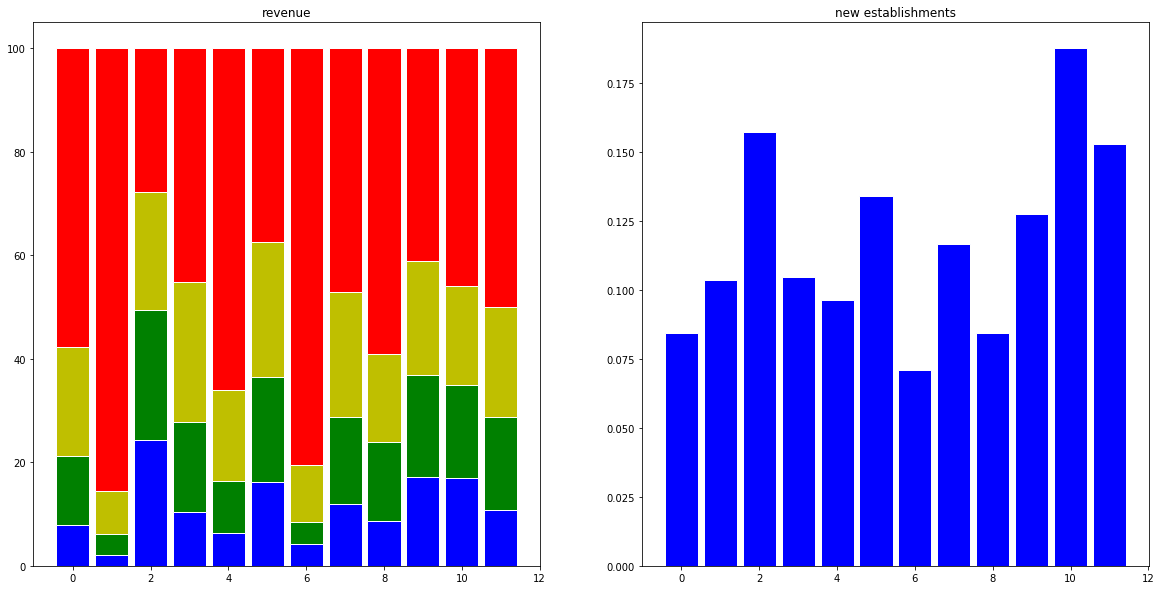

In [218]:
#plot some bar graphs
r = list(range(12))
red = []
yellow = []
green = []
blue = []
black = []
ct_result = sum_revenue_types
for key, value in ct_result.items():
    red.append(value[6])
    yellow.append(value[5])
    green.append(value[4])
    blue.append(value[3])
    black.append(value[2]/value[0])
totals = [i+j+k+m for i,j,k,m in zip(red, yellow, green, blue)]
#the percentages of each revenue range from the total
#red means revenue > 1,000,000
#yellow means revenue (500,000 - 1,000,000)
#green means revenue (250,000 - 500,000)
#blue means revenue (100,000 - 250,000)
red = [i / j * 100 for i,j in zip(red, totals)]
yellow = [i / j * 100 for i,j in zip(yellow, totals)]
green = [i / j * 100 for i,j in zip(green, totals)]
blue = [i / j * 100 for i,j in zip(blue, totals)]

# plot
barWidth = 0.85
names = ('A','B','C','D','E')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('revenue')
plt.bar(r, blue, color='b', edgecolor='white', width=barWidth)
plt.bar(r, green, bottom=blue, color='g', edgecolor='white', width=barWidth)
plt.bar(r, yellow, bottom=[i+j for i,j in zip(blue, green)], color='y', edgecolor='white', width=barWidth)
plt.bar(r, red, bottom=[i+j+k for i,j,k in zip(blue, green, yellow)], color='r', edgecolor='white', width=barWidth)

plt.subplot(1,2,2)
plt.title('new establishments')
plt.bar(r, black, color='b', edgecolor='white', width=barWidth)
plt.savefig('national.png')

In [ ]:
#get the national revenue distribution in terms of percentages
r = list(range(12))
high = []
med = []
low = []
very_low = []
national_new_estab = []
for key, value in national_revenue_types.items():
    high.append(value[6])
    med.append(value[5])
    low.append(value[4])
    very_low.append(value[3])
    national_new_estab.append(value[2]/value[0])
totals = [i+j+k+m for i,j,k,m in zip(high, med, low, very_low)]
national_high_pct = np.array([i / j * 100 for i,j in zip(high, totals)])
print('national percentage of high revenue establishments for each industry')
print(national_high_pct)
national_new_estab = np.array(national_new_estab)
print('national percentage of new establishments for each industry')
print(national_new_estab)

In [263]:
#and now do the same for the states, and compare
#the states that have industries with a higher percentage revenue
#compared to the nation, is prioritized
#so as the ones who have new establishments
leading_rev_by_state = {}
best_state_industries = {}
total_leading_rev_by_state = []
total_best_state_industries = []
r = list(range(12))
for state, sum_revenue_types in sum_revenue_types_by_state.items():
    high = []
    med = []
    low = []
    very_low = []
    new_estab = []
    for key, value in sum_revenue_types.items():
        high.append(value[6])
        med.append(value[5])
        low.append(value[4])
        very_low.append(value[3])
        new_estab.append(value[2]/value[0])
    totals = [i+j+k+m for i,j,k,m in zip(high, med, low, very_low)]
    high_pct = np.array([i / j * 100 for i,j in zip(high, totals)])
    better_pct =  [i-j if i > j else 0 for i,j in zip(high_pct, national_high_pct)]
    better_new =  [i-j if i > j else 0 for i,j in zip(new_estab, national_new_estab)]
    leading_rev_by_state[state] = better_pct
    best_state_industries[state] = better_new
    total_leading_rev_by_state += better_pct
    total_best_state_industries += better_new
    

In [ ]:
total_leading_startup_by_state = np.array(total_best_state_industries)
print(len(total_leading_startup_by_state))
print(total_leading_startup_by_state[revenue_rank])

In [ ]:
total_leading_rev_by_state = np.array(total_leading_rev_by_state)
total_leading_startup_by_state = np.array(total_best_state_industries)
revenue_rank = total_leading_rev_by_state.argsort()[::-1]
revenue_rank_by_state = [states_match[i//12] for i in revenue_rank]
revenue_rank_by_industry = [industry_codes[i%12] for i in revenue_rank]
final_revenue_rank = list(zip(revenue_rank_by_state, revenue_rank_by_industry, total_leading_rev_by_state[revenue_rank], total_leading_startup_by_state[revenue_rank]))
print(final_revenue_rank)

In [407]:
def write_csv(filename, arr):
    with open(filename, 'w') as f:
        for i in arr:
            s = ','.join(map(str, i))
            f.write(s)
            f.write('\n')

In [426]:
chosen_states = ['AL', 'AK', 'DC', 'SD', 'VT', 'DE', 'UT', 'NV', 'ME', 'WY']
chosen_industries = ['445', '441', '443', '442', '445', '452', '443', '441', '445', '447']
#the 10 highest rated states-industry pairings we found
#process them again as we did before
for idx in range(10):
    begin = states_idx[states_match_idx[chosen_states[idx]]]
    end = states_idx[states_match_idx[chosen_states[idx]] + 1]
    zipcodes = geo_id2[begin:end]
    state_naics = naics[begin:end]
    state_rcpszfe_id = rcpszfe_id[begin:end]
    state_estab = estab[begin:end]
    state_geo_id = geo_id[begin:end]
    #print(zipcodes)
    zip_idx = [0]

    for i in range(1, len(zipcodes)):
        if zipcodes[i] != zipcodes[i-1]:
            zip_idx.append(i+1)
    sum_revenue_types_by_zip = get_revenue_type(state_naics, state_rcpszfe_id, state_estab, zip_idx, zipcodes, chosen_industries[idx])
    sum_revenue_types_by_zip = sorted(sum_revenue_types_by_zip, key=lambda element: (element[2], element[6]), reverse = True)
    result = np.array(sum_revenue_types_by_zip[:10])
    state_result = [(chosen_states[idx],chosen_industries[idx],i,j,k) for i,j,k in zip(result[:,2], result[:,6], result[:,7])]
    filename = chosen_states[idx] + chosen_industries[idx] + '_new' + '.csv'
    write_csv(filename, state_result)

In [425]:
def get_revenue_type(naics, rcpszfe_id, estab, states_idx, states, department):
    rcpszfe_types = ['001', '002', '998', '123', '125', '131', '132']
    sum_revenue_types_by_state = []
    for idx in range(len(states_idx)-1):
        cur_state = states[states_idx[idx]]
        begin = states_idx[idx]
        if idx == len(states_idx)-1:
            end = len(naics)
        else:
            end = states_idx[idx+1]
        current = []
        idx_1 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 1 and index >= begin and index < end]
        idx_2 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 2 and index >= begin and index < end]
        idx_998 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 998 and index >= begin and index < end]
        idx_123 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 123 and index >= begin and index < end]
        idx_125 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 125 and index >= begin and index < end]
        idx_131 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 131 and index >= begin and index < end]
        idx_132 = [index for index in range(len(naics)) if naics[index] == department and rcpszfe_id[index] == 132 and index >= begin and index < end]
        current.append(sum([int(estab[i]) for i in idx_1]))
        current.append(sum([int(estab[i]) for i in idx_2]))
        current.append(sum([int(estab[i]) for i in idx_998]))
        current.append(sum([int(estab[i]) for i in idx_123]))
        current.append(sum([int(estab[i]) for i in idx_125]))
        current.append(sum([int(estab[i]) for i in idx_131]))
        current.append(sum([int(estab[i]) for i in idx_132]))
        current.append(cur_state)
        sum_revenue_types_by_state.append(current)
    return sum_revenue_types_by_state

In [411]:
#help clean up data for the city population data
colnames = ['geo_id', 'geo_id2', 'geo_display_label', 'gc_id', 'gc', 'RCPSZFE_id', 'label', 'year', 'number']
population = pandas.read_csv('population.csv', names=colnames)

In [ ]:
city = population.label.tolist()[2:] 
pop = population.number.tolist()[2:]
city = [i.replace('United States - ', '').split(',')[0].replace(' city','').replace('(balance)','') for i in city]
file = [(i,j) for i,j in zip(city, pop)]
print(file[:10])
write_csv('city.csv', file)